In [34]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
X_test.shape

(10000, 28, 28)

In [38]:
single_image= X_train[0]

In [39]:
single_image.shape

(28, 28)

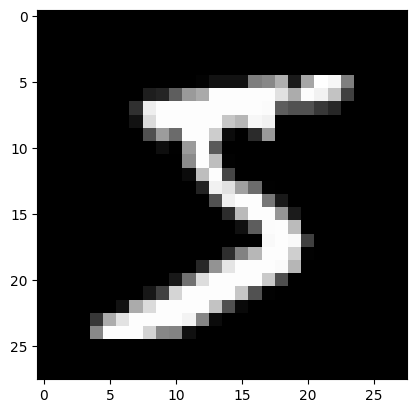

In [40]:
plt.imshow(single_image,cmap='gray')

In [41]:
y_train.shape

(60000,)

In [42]:
X_train.min()

0

In [43]:
X_train.max()

255

In [44]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [45]:
X_train_scaled.min()

0.0

In [46]:
X_train_scaled.max()

1.0

In [47]:
y_train[0]

5

In [48]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [49]:
type(y_train_onehot)

numpy.ndarray

In [50]:
y_train_onehot.shape

(60000, 10)

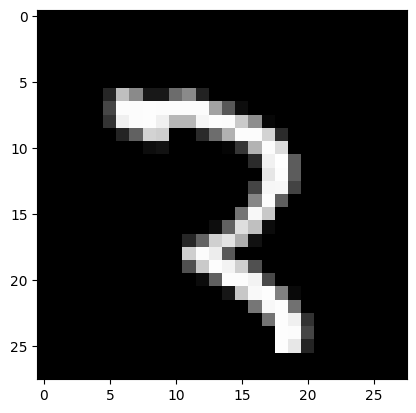

In [51]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [52]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [53]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [54]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()
print("\n name: Dharshni V M\n Reg no: 212223240029\n")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


 name: Dharshni V M
 Reg no: 212223240029



In [56]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 70ms/step - accuracy: 0.8688 - loss: 0.4239 - val_accuracy: 0.9770 - val_loss: 0.0693
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 67ms/step - accuracy: 0.9827 - loss: 0.0585 - val_accuracy: 0.9858 - val_loss: 0.0411
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 72ms/step - accuracy: 0.9880 - loss: 0.0362 - val_accuracy: 0.9908 - val_loss: 0.0270
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9916 - loss: 0.0265 - val_accuracy: 0.9923 - val_loss: 0.0254
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9935 - loss: 0.0216 - val_accuracy: 0.9899 - val_loss: 0.0331


In [58]:
metrics = pd.DataFrame(model.history.history)

In [59]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.944350,0.182507,0.9770,0.069321
1,0.984250,0.051550,0.9858,0.041065
2,0.987683,0.037204,0.9908,0.027042
3,0.991100,0.027880,0.9923,0.025390
4,0.992783,0.022802,0.9899,0.033137


name: Dharshni V M
 Reg no: 212223240029



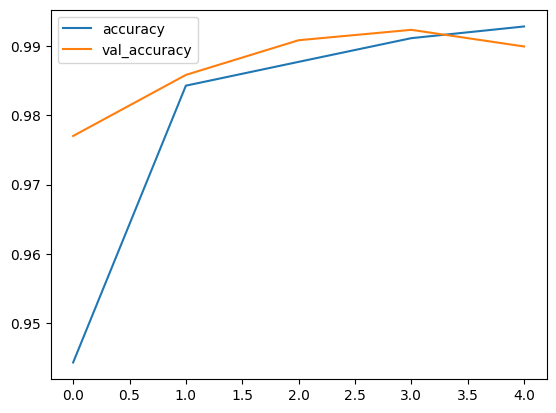

In [60]:
metrics[['accuracy','val_accuracy']].plot()
print("name: Dharshni V M\n Reg no: 212223240029\n")

name: Dharshni V M
 Reg no: 212223240029



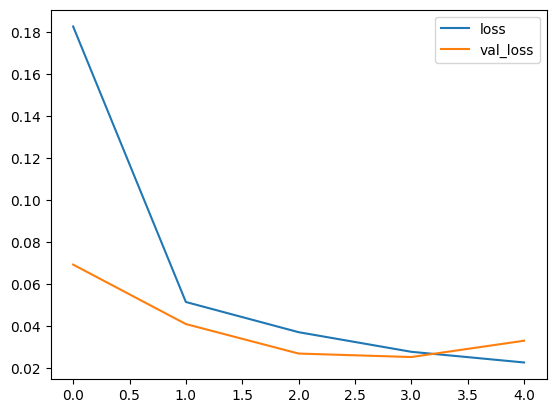

In [61]:
metrics[['loss','val_loss']].plot()
print("name: Dharshni V M\n Reg no: 212223240029\n")

In [62]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [63]:
print(confusion_matrix(y_test,x_test_predictions))
print("name: Dharshni V M\n Reg no: 212223240029\n")

[[ 976    1    0    0    0    0    0    2    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1022    0    2    0    0    4    1    0]
 [   0    1    6  996    1    4    0    1    1    0]
 [   0    1    0    0  980    0    0    0    0    1]
 [   2    2    0    4    0  881    1    0    1    1]
 [   6    3    0    0    6    1  941    0    1    0]
 [   0    5    2    0    0    0    0 1020    0    1]
 [   2    1    3    1    2    0    1    1  962    1]
 [   1    3    0    0    5    3    0    4    7  986]]
name: Dharshni V M
 Reg no: 212223240029



In [64]:
print(classification_report(y_test,x_test_predictions))
print("name: Dharshni V M\n Reg no: 212223240029\n")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

name: Dharshni V M
 Reg no: 212223240029



In [65]:
img = image.load_img('image.png')

In [66]:
type(img)

PIL.Image.Image

In [67]:
img = image.load_img('image.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


 name: Dharshni V M
 Reg no: 212223240029



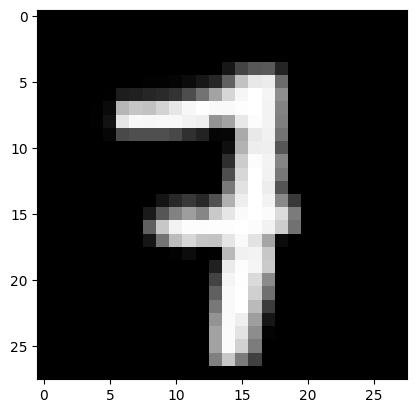

In [68]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("\n name: Dharshni V M\n Reg no: 212223240029\n")

In [69]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [70]:
print(x_single_prediction)

[7]
